# KMeans

## Exercise 1

In [2]:
import pandas as pd

df=pd.read_csv("https://raw.githubusercontent.com/tuyenhavan/Course_Data/main/data.csv").iloc[:,1:]
df.head()

,f1,f2
0,2.605097,1.225296
1,0.532377,3.313389
2,0.802314,4.381962
3,0.528537,4.497239
4,2.618585,0.357698


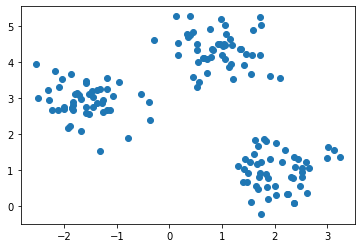

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df.f1,df.f2)

### Building a KMeans model

In [4]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
distortions=[]

for k in range(1,8):
    model=KMeans(n_clusters=k)
    model.fit(df)
    distance=sum(np.min(cdist(df, model.cluster_centers_,"euclidean"), axis=1))/df.shape[0]
    distortions.append(distance)
distortions

[2.108307936953252,
 1.2486315288770555,
 0.6166897472927628,
 0.566993121119485,
 0.5231576953866156,
 0.4964936374897017,
 0.45525684575964875]

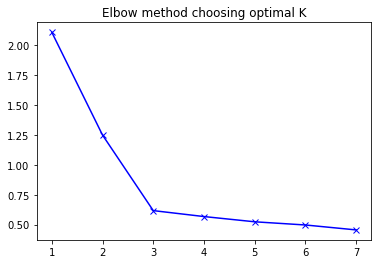

In [5]:
# VIsualizing the distortions
plt.plot(range(1,8), distortions, "bx-")
plt.title("Elbow method choosing optimal K")
plt.show()

### It is observed that n_clusters =3 best fit

In [6]:
model=KMeans(n_clusters=3)
model.fit(df)

KMeans(n_clusters=3)

In [8]:
# Get centroids
centroids=model.cluster_centers_
centroids

array([[ 2.06521743,  0.96137409],
       [ 0.9329651 ,  4.35420712],
       [-1.5947298 ,  2.92236966]])

In [9]:
# Get labels
labels=model.labels_
labels

array([0, 1, 1, 1, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 1, 2, 2, 0, 2, 0, 1, 0,
       1, 1, 2, 0, 0, 1, 2, 0, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 2, 1, 0,
       0, 0, 2, 1, 2, 1, 0, 1, 1, 0, 0, 2, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 0, 1, 0, 1, 0, 1, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1,
       2, 1, 0, 2, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 0, 0, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 1, 2, 0, 2, 1, 1, 0, 0, 2, 2, 2, 2, 0, 0])

In [11]:
df["Group"]=pd.Series(labels)
df.head()

,f1,f2,Group
0,2.605097,1.225296,0
1,0.532377,3.313389,1
2,0.802314,4.381962,1
3,0.528537,4.497239,1
4,2.618585,0.357698,0


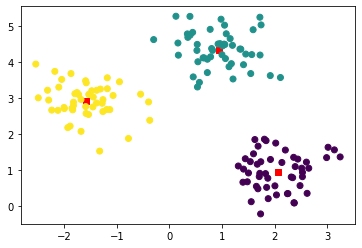

In [19]:
plt.scatter(centroids[:,0], centroids[:,1], marker="s", color="r")

plt.scatter(df.f1,df.f2, c=df.Group)
plt.show()

# Exercise 2: Customer Segmentation

In [27]:
df=pd.read_csv("https://raw.githubusercontent.com/tuyenhavan/Course_Data/main/ageinc_g.csv").iloc[:,1:]
df.head()

,income,age,gender
0,101743,58,Female
1,49597,27,Female
2,36517,52,Male
3,33223,49,Male
4,72994,53,Female


###### Data preprocessing

In [28]:
# Check missing values

df.isnull().sum()

income    0
age       0
gender    0
dtype: int64

In [29]:
#Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   income  1000 non-null   int64 
 1   age     1000 non-null   int64 
 2   gender  1000 non-null   object
dtypes: int64(2), object(1)
memory usage: 23.6+ KB


In [31]:
# Get dummies
X=pd.get_dummies(df)
X.head()

,income,age,gender_Female,gender_Male
0,101743,58,1,0
1,49597,27,1,0
2,36517,52,0,1
3,33223,49,0,1
4,72994,53,1,0


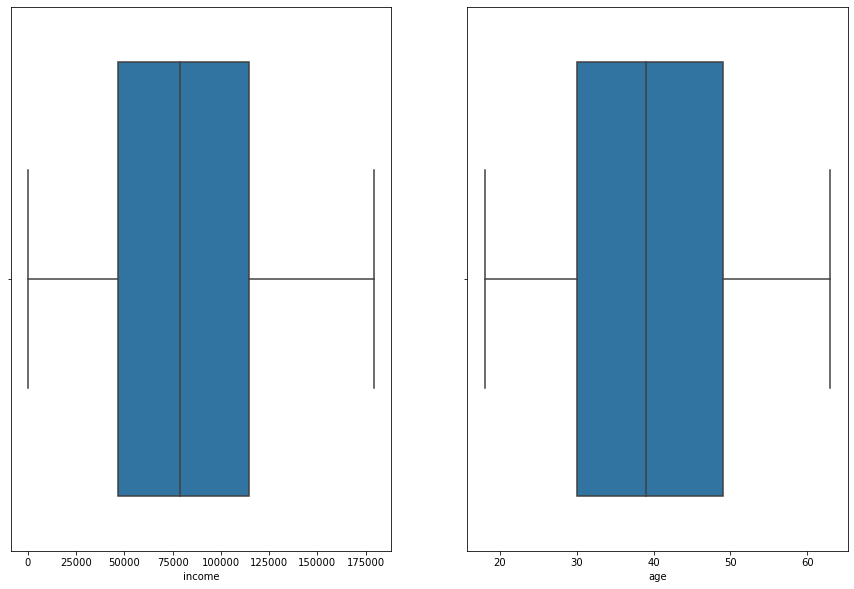

In [39]:
# Standardize numeric variables
# Check outliers and distribution
import seaborn as sns
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)

sns.boxplot(df.income)

plt.subplot(1,2,2)

sns.boxplot(df.age)
plt.show()

<AxesSubplot:xlabel='income'>

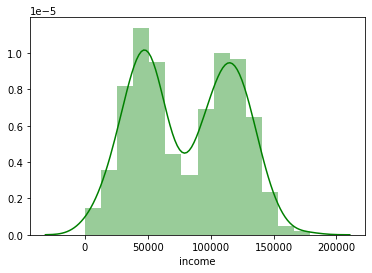

In [41]:
# Check distribution
sns.distplot(df.income, color="g")

<AxesSubplot:xlabel='age'>

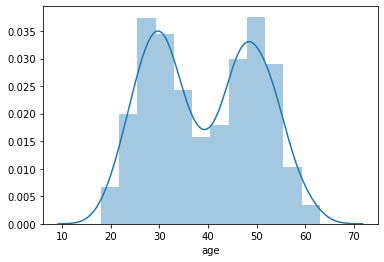

In [42]:
# Check distribution
sns.distplot(df.age)

In [45]:
# No outliers, we can use MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

X_scaler=X.iloc[:, :2]

np_scaler=scaler.fit_transform(X_scaler)

In [48]:
np_scaler=pd.DataFrame(np_scaler, columns=["Income","Age"])
# Concat to create a dataframe

df_scaler=pd.concat([np_scaler, X.gender_Male], axis=1)

df_scaler.head()

,Income,Age,gender_Male
0,0.567465,0.888889,0
1,0.276624,0.200000,0
2,0.203671,0.755556,1
3,0.185299,0.688889,1
4,0.407119,0.777778,0


##### Building KMeans model

In [49]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [53]:
distortions=[]

for k in range(1,8):
    model=KMeans(n_clusters=k)
    model.fit(df_scaler)
    distance=sum(np.min(cdist(df_scaler, model.cluster_centers_,"euclidean"), axis=1))/df_scaler.shape[0]
    distortions.append(distance)
distortions

[0.5952367150564553,
 0.31121145665167976,
 0.2685053532553122,
 0.2259260034823932,
 0.19752038658346124,
 0.1742797080873323,
 0.15115346497523324]

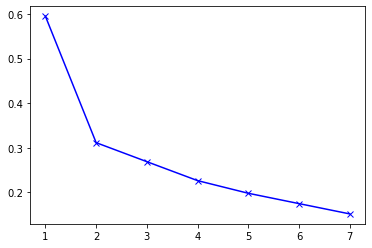

In [56]:
# Visualize 

plt.plot(range(1,8), distortions,"bx-")

In [64]:
# Choosing K=4
kmeanModel=KMeans(n_clusters=4)
kmeanModel.fit(df_scaler)
centroids=kmeanModel.cluster_centers_
centroids
labels=kmeanModel.labels_

In [67]:
df_scaler["Label"]=pd.Series(labels)
df_back=pd.concat([df, df_scaler.Label], axis=1)

df_back

,income,age,gender,Label
0,101743,58,Female,1
1,49597,27,Female,2
2,36517,52,Male,0
3,33223,49,Male,0
4,72994,53,Female,1
...,...,...,...,...
995,70615,29,Female,2
996,95102,41,Female,1
997,42203,35,Male,3
998,16975,31,Female,2


# Apriori Methods

In [69]:
df=pd.read_csv("https://raw.githubusercontent.com/tuyenhavan/Course_Data/main/store_data.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
records=[]

for i in range(0, df.shape[0]):
    records.append([str(df.values[i,j]) for j in range(0, df.shape[1])])
records[0]

['shrimp',
 'almonds',
 'avocado',
 'vegetables mix',
 'green grapes',
 'whole weat flour',
 'yams',
 'cottage cheese',
 'energy drink',
 'tomato juice',
 'low fat yogurt',
 'green tea',
 'honey',
 'salad',
 'mineral water',
 'salmon',
 'antioxydant juice',
 'frozen smoothie',
 'spinach',
 'olive oil']

In [73]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [78]:
te=TransactionEncoder()
te_fit=te.fit(records).transform(records)
df=pd.DataFrame(te_fit, columns=te.columns_)
df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [79]:
# Remove nan
df=df.drop(["nan"], axis=1)
df.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [80]:
frequent_itemsets=apriori(df, min_support=0.03, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.033329,(avocado)
1,0.033729,(brownies)
2,0.087188,(burgers)
3,0.030129,(butter)
4,0.081056,(cake)


In [89]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
1,(frozen vegetables),(mineral water),0.095321,0.238368,0.035729,0.374825,1.572463,0.013007,1.218270
2,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
3,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997
4,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650
5,(pancakes),(mineral water),0.095054,0.238368,0.033729,0.354839,1.488616,0.011071,1.180529
6,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
